In [1]:
import numpy as np

class Adaline:
    def __init__(self, lr=0.01, iters=10): self.lr, self.iters = lr, iters
    def fit(self, X, y):
        self.w = np.zeros(1 + X.shape[1])
        for _ in range(self.iters):
            output = np.dot(X, self.w[1:]) + self.w[0]
            error = y - output
            self.w[1:] += self.lr * X.T.dot(error)
            self.w[0] += self.lr * error.sum()
    def predict(self, X): return np.dot(X, self.w[1:]) + self.w[0]

X = np.array([[1,2],[2,3],[3,4]])
y = np.array([1,1,0])
model = Adaline()
model.fit(X, y)
print("Weights:", model.w)
print("Prediction:", model.predict(np.array([2,3])))

Weights: [0.08127088 0.03660716 0.11787805]
Prediction: 0.5081193508836386


In [3]:
import csv

with open('trainingdata.csv') as f:
    data = [row for row in csv.reader(f) if row and row[-1].strip().lower() == 'yes']

hypothesis = data[0][:-1]  # Initialize with first positive example
for row in data[1:]:
    for i in range(len(hypothesis)):
        if hypothesis[i] != row[i]:
            hypothesis[i] = '?'

print("Most specific hypothesis:", hypothesis)


Most specific hypothesis: ['Sunny', 'Warm', '?', 'Strong', '?', '?']


In [4]:
#Candidate Elimination
import pandas as pd, numpy as np

data = pd.read_csv('trainingdata.csv')
X, y = np.array(data.iloc[:, :-1]), np.array(data.iloc[:, -1])
S = X[0].copy()
G = [["?" for _ in S] for _ in S]

for i, x in enumerate(X):
    if y[i] == 'yes':
        S = ["?" if S[j] != x[j] else S[j] for j in range(len(S))]
    else:
        for j in range(len(S)):
            if S[j] != x[j]: G[j][j] = S[j]
            else: G[j][j] = "?"

G = [g for g in G if g != ["?"] * len(S)]
print("Final Specific Hypothesis:\n", S)
print("Final General Hypotheses:\n", G)


Final Specific Hypothesis:
 ['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
Final General Hypotheses:
 [['?', '?', '?', '?', 'Warm', '?'], ['?', '?', '?', '?', '?', 'Same']]


k-Means Silhouette: 0.55, GMM Silhouette: 0.50


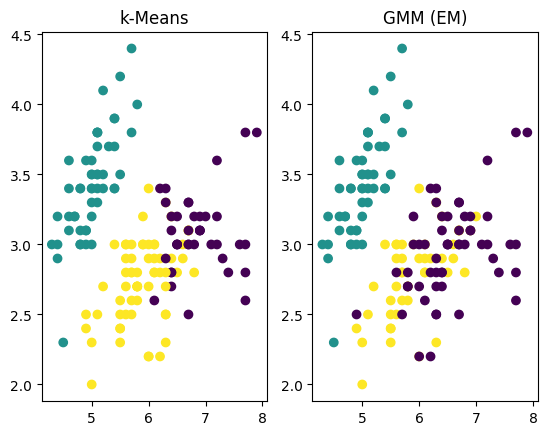

In [5]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X = load_iris().data
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
gmm = GaussianMixture(n_components=3, random_state=42).fit(X)
k_labels, g_labels = kmeans.predict(X), gmm.predict(X)
print(f"k-Means Silhouette: {silhouette_score(X, k_labels):.2f}, GMM Silhouette: {silhouette_score(X, g_labels):.2f}")
plt.subplot(1,2,1); plt.scatter(X[:,0], X[:,1], c=k_labels); plt.title("k-Means")
plt.subplot(1,2,2); plt.scatter(X[:,0], X[:,1], c=g_labels); plt.title("GMM (EM)"); plt.show()


In [6]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
predictions = model.predict(X_test)

for i, (pred, actual) in enumerate(zip(predictions, y_test)):
    print(f"{i+1}. Predicted: {pred}, Actual: {actual}", "✅" if pred == actual else "❌")

1. Predicted: 1, Actual: 1 ✅
2. Predicted: 0, Actual: 0 ✅
3. Predicted: 2, Actual: 2 ✅
4. Predicted: 1, Actual: 1 ✅
5. Predicted: 1, Actual: 1 ✅
6. Predicted: 0, Actual: 0 ✅
7. Predicted: 1, Actual: 1 ✅
8. Predicted: 2, Actual: 2 ✅
9. Predicted: 1, Actual: 1 ✅
10. Predicted: 1, Actual: 1 ✅
11. Predicted: 2, Actual: 2 ✅
12. Predicted: 0, Actual: 0 ✅
13. Predicted: 0, Actual: 0 ✅
14. Predicted: 0, Actual: 0 ✅
15. Predicted: 0, Actual: 0 ✅
16. Predicted: 1, Actual: 1 ✅
17. Predicted: 2, Actual: 2 ✅
18. Predicted: 1, Actual: 1 ✅
19. Predicted: 1, Actual: 1 ✅
20. Predicted: 2, Actual: 2 ✅
21. Predicted: 0, Actual: 0 ✅
22. Predicted: 2, Actual: 2 ✅
23. Predicted: 0, Actual: 0 ✅
24. Predicted: 2, Actual: 2 ✅
25. Predicted: 2, Actual: 2 ✅
26. Predicted: 2, Actual: 2 ✅
27. Predicted: 2, Actual: 2 ✅
28. Predicted: 2, Actual: 2 ✅
29. Predicted: 0, Actual: 0 ✅
30. Predicted: 0, Actual: 0 ✅
31. Predicted: 0, Actual: 0 ✅
32. Predicted: 0, Actual: 0 ✅
33. Predicted: 1, Actual: 1 ✅
34. Predicted: 0, A

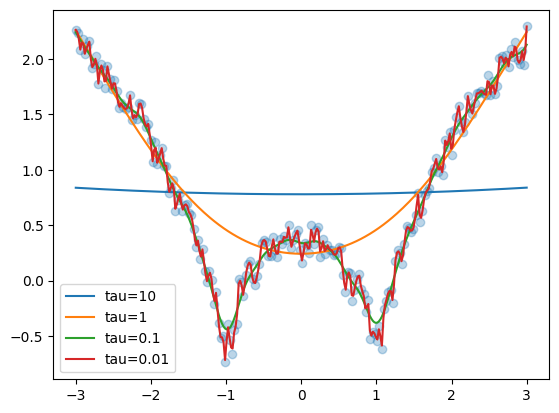

In [7]:
#Locally weighted regression with synthetic data
import numpy as np
import matplotlib.pyplot as plt

def lwlr(x0,X,Y,tau):
    X_b=np.c_[np.ones(len(X)),X]; x0_b=np.r_[1,x0]
    w=np.exp(-np.sum((X_b - x0_b)**2,axis=1)/(2*tau**2))
    W=np.diag(w); beta=np.linalg.pinv(X_b.T@W@X_b)@X_b.T@W@Y
    return x0_b@beta

X=np.linspace(-3,3,200); Y=np.log(np.abs(X**2-1)+0.5)+np.random.normal(0,0.1,200)
domain=np.linspace(-3,3,300)

for tau in [10,1,0.1,0.01]:
    plt.plot(domain,[lwlr(x,X,Y,tau) for x in domain],label=f'tau={tau}')
plt.scatter(X,Y,alpha=0.3); plt.legend(); plt.show()

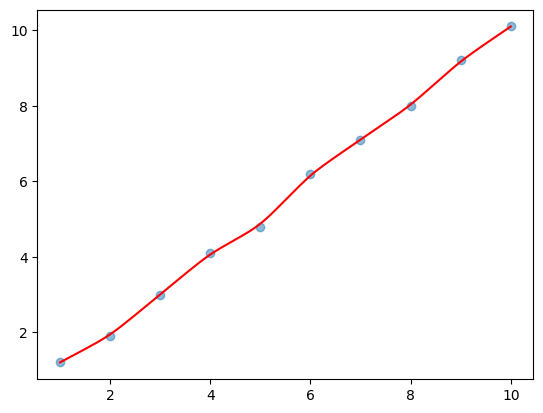

In [10]:
#Locally weighted regression with dataset of our own choice

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def kernel(x0, X, tau): return np.exp(-np.sum((X - x0)**2, axis=1) / (2 * tau**2))
def lwr(x0, X, Y, tau):
    X_b = np.c_[np.ones(len(X)), X]; x0_b = np.r_[1, x0]
    W = np.diag(kernel(x0_b, X_b, tau))
    beta = np.linalg.pinv(X_b.T @ W @ X_b) @ X_b.T @ W @ Y
    return x0_b @ beta

data = pd.read_csv('trainingdata1.csv') #Replace this with your file name which contains x and y coordibnates
X, Y = data['x'].values, data['y'].values
domain = np.linspace(X.min(), X.max(), 200)
preds = [lwr(x0, X, Y, tau=0.5) for x0 in domain]

plt.scatter(X, Y, alpha=0.5)
plt.plot(domain, preds, color='red')
plt.show()


In [13]:
#Naive Bayes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = pd.read_csv('your_file.csv')
X = data.drop('label', axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
report = classification_report(y_test, y_pred, labels=[0, 1])

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)


Accuracy: 1.00
Confusion Matrix:
 [[1 0]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

